## Decision Trees with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# For this analysis, we will drop some of the attributes
titanic.drop(['Cabin','Name','Age','Ticket','Embarked'],axis=1, inplace=True)
titanic.head()
titanic['Sex'].replace(['female','male'],[0,1],inplace=True)
titanic

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,1,1,0,7.2500
1,2,1,1,0,1,0,71.2833
2,3,1,3,0,0,0,7.9250
3,4,1,1,0,1,0,53.1000
4,5,0,3,1,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.0000
887,888,1,1,0,0,0,30.0000
888,889,0,3,0,1,2,23.4500
889,890,1,1,1,0,0,30.0000


## EDA

As a routine, let us check the pairwise distribution of our data -- this might run for a while

C:\Users\llin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\llin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


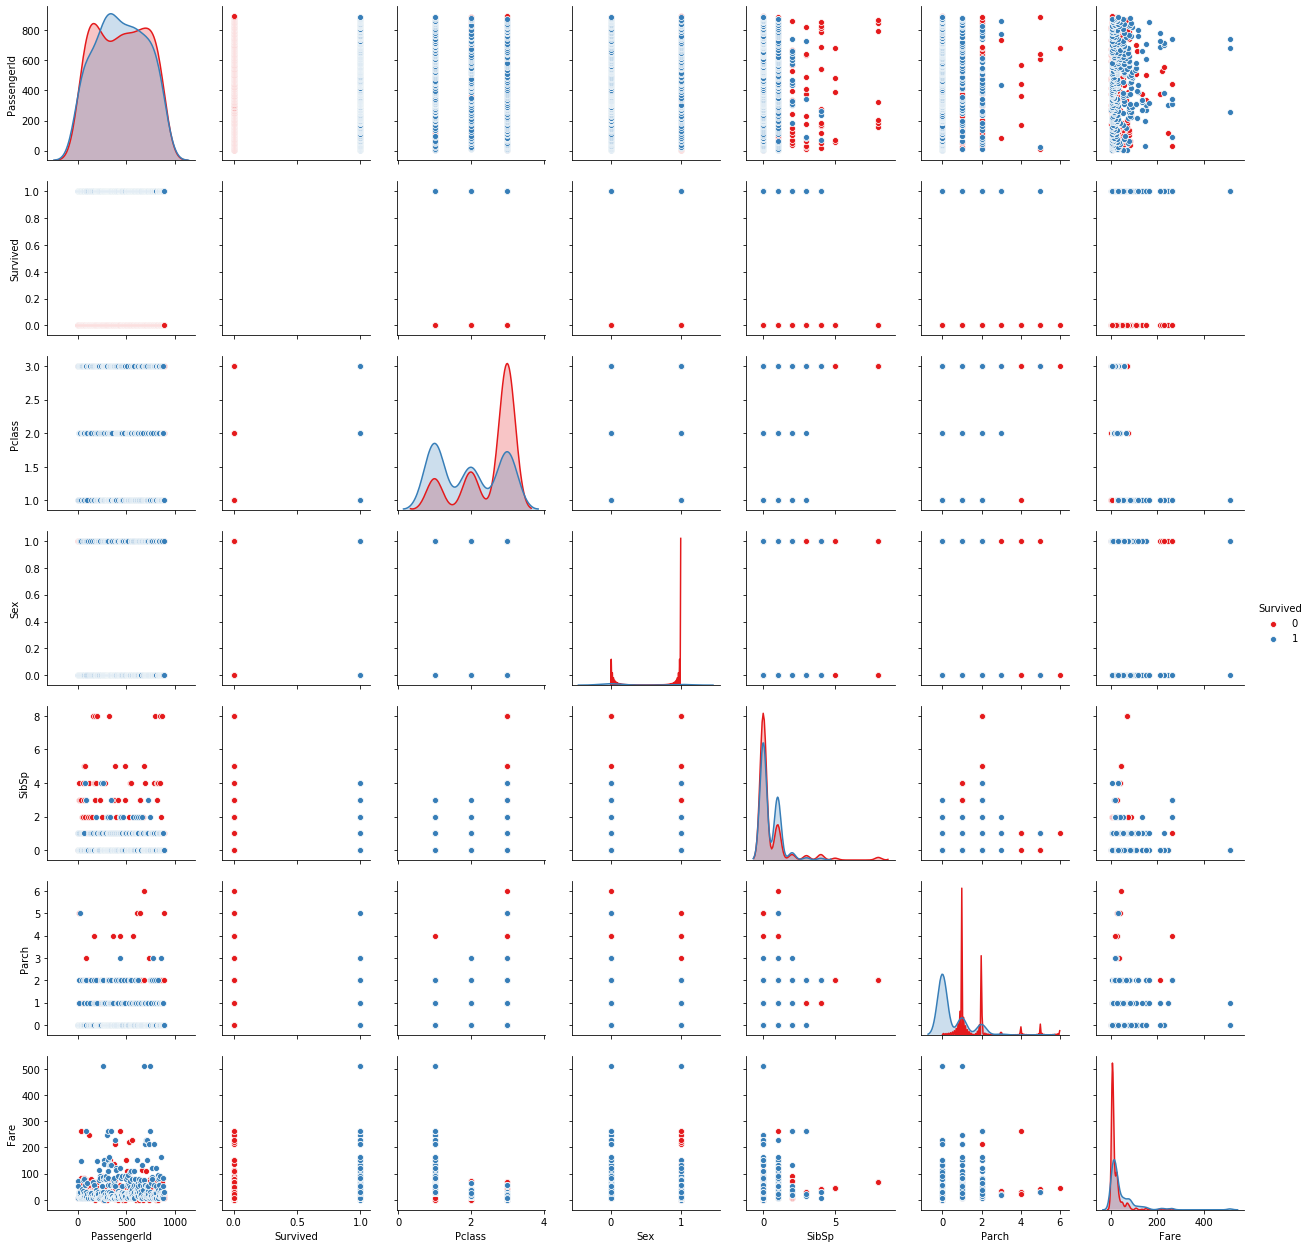

In [5]:
sns.pairplot(titanic,hue='Survived',palette='Set1')

## Train Test Split

By now you should be used to the routine of spliting data into training and testing set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Building a Decision Trees


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       168
           1       0.68      0.65      0.67       100

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [16]:
print(confusion_matrix(y_test,predictions))

[[138  30]
 [ 35  65]]
